In [1]:
# Multiple Linear Regression using OLS
# Dataset: Sales data
# import the libraries
# --------------------
import pandas as pd
import numpy as np
import math
import pylab #(for graphs.)
import matplotlib.pyplot as plot


# uses Ordinary Least Squares (OLS) method
# -------------------------------------------
import statsmodels.api as sm

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats

import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.svm import SVR
# VIF
# ---
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature selection
# -----------------
from sklearn.feature_selection import f_regression as fs

# </import libraries>

In [2]:
path = "F:/Python/Project/salesdata.csv"
sale = pd.read_csv(path)

print(sale.shape)
print(sale.dtypes)
sale.head(5)

(14204, 12)
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#To know information of dataset
print(sale.info())

#Describe(Summary of) dataset
sale.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB
None


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
# summarize the dataset
# clearer view. removed the 1st row as it contains same info (total records)
# ------------------------------------------------------------
desc = sale.describe()
desc = sale.drop(sale.index[0])  #to remove first index (count) which is not necessary.
desc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [5]:
# check for NULLS, blanks and zeroes
# -------------------------------
cols = list(sale.columns)
type(cols)
cols.remove("Item_Outlet_Sales")   #we remove y variable.
print(cols)

for c in cols:
    if (len(sale[c][sale[c].isnull()])) > 0:
        print("WARNING: Column '{}' has NULL values".format(c))

    if (len(sale[c][sale[c] == 0])) > 0:
        print("WARNING: Column '{}' has value = 0".format(c))


['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [6]:
#Drop columns Item_Identifier and Outlet_Identifier
del sale['Item_Identifier']
del sale['Outlet_Identifier']

sale.shape

(14204, 10)

In [7]:
#Gives different levels of particular column       
print(sale['Outlet_Location_Type'].unique())
sale['Outlet_Type'].unique()

['Tier 1' 'Tier 3' 'Tier 2']


array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [8]:
#Replace NULL's in Item_Weight with median
weight_median = sale['Item_Weight'].median()
sale.Item_Weight[sale.Item_Weight.isnull()] = weight_median

#Levels in Item_Fat_Content
sale['Item_Fat_Content'].unique() 

C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [9]:
sale.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [10]:
#Reducing levels of column Item_Fat_Content
sale.Item_Fat_Content[sale.Item_Fat_Content == "low fat"] = "Low Fat"
sale.Item_Fat_Content[sale.Item_Fat_Content == "LF"] = "Low Fat"
sale.Item_Fat_Content[sale.Item_Fat_Content == "reg"] = "Regular"

#Replace "Low Fat" = 1 And "Regular" = 2
sale.Item_Fat_Content[sale.Item_Fat_Content == 'Low Fat'] = 1
sale.Item_Fat_Content[sale.Item_Fat_Content == 'Regular'] = 2

#Convert Item_Fat_Content to Numeric
sale[['Item_Fat_Content']] = sale[['Item_Fat_Content']].apply(pd.to_numeric)

sale.dtypes

#Levels in Item_Type 
sale['Item_Type'].unique()
      
#Replace levels in Item_Type with numbers
sale.Item_Type[sale.Item_Type == "Dairy"] = 1
sale.Item_Type[sale.Item_Type == "Soft Drinks"] = 2
sale.Item_Type[sale.Item_Type == "Meat"] = 3
sale.Item_Type[sale.Item_Type == "Fruits and Vegetables"] = 4
sale.Item_Type[sale.Item_Type == "Household"] = 5
sale.Item_Type[sale.Item_Type == "Baking Goods"] = 6
sale.Item_Type[sale.Item_Type == "Snack Foods"] = 7
sale.Item_Type[sale.Item_Type == "Frozen Foods"] = 8
sale.Item_Type[sale.Item_Type == "Breakfast"] = 9
sale.Item_Type[sale.Item_Type == "Health and Hygiene"] = 10
sale.Item_Type[sale.Item_Type == "Hard Drinks"] = 11
sale.Item_Type[sale.Item_Type == "Canned"] = 12
sale.Item_Type[sale.Item_Type == "Breads"] = 13
sale.Item_Type[sale.Item_Type == "Starchy Foods"] = 14
sale.Item_Type[sale.Item_Type == "Others"] = 15
sale.Item_Type[sale.Item_Type == "Seafood"] = 16

#Convert Item_Type to Numeric
sale[['Item_Type']] = sale[['Item_Type']].apply(pd.to_numeric)
sale.dtypes

C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [11]:
#Levels in Outlet_Size
sale['Outlet_Size'].unique()

#Replace 'nan' with 'unknown'
sale.Outlet_Size = sale[['Outlet_Size']].fillna('Unknown')

In [12]:
#Replace levels in Outlet_Size  with numbers
#"High" = 1,"Medium" = 2  "Small" = 3, "Unknown" = 4
sale.Outlet_Size[sale.Outlet_Size == 'High'] = 1
sale.Outlet_Size[sale.Outlet_Size == 'Medium'] = 2
sale.Outlet_Size[sale.Outlet_Size == 'Small'] = 3
sale.Outlet_Size[sale.Outlet_Size == 'Unknown'] = 4

#Convert Outlet_Size to Numeric
sale[['Outlet_Size']] = sale[['Outlet_Size']].apply(pd.to_numeric)
sale.dtypes

C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [13]:
#Levels in Outlet_Location_Type
sale['Outlet_Location_Type'].unique()

#Replace levels in Outlet_Location_Type with numbers
# "Tier 1" =1, "Tier 2" =2, "Tier 3" =3
sale.Outlet_Location_Type[sale.Outlet_Location_Type == 'Tier 1'] = 1
sale.Outlet_Location_Type[sale.Outlet_Location_Type == 'Tier 2'] = 2
sale.Outlet_Location_Type[sale.Outlet_Location_Type == 'Tier 3'] = 3

#Convert Outlet_Location_Type to Numeric
sale[['Outlet_Location_Type']] = sale[['Outlet_Location_Type']].apply(pd.to_numeric)
sale.dtypes

#Levels in Outlet_Size
sale['Outlet_Type'].unique()

#Replace levels in Outlet_Type with numbers
# "Supermarket Type1" = 1,"Supermarket Type2"= 2,
# "Supermarket Type3" = 3,"Grocery Store" =4
sale.Outlet_Type[sale.Outlet_Type == 'Supermarket Type1'] = 1
sale.Outlet_Type[sale.Outlet_Type == 'Supermarket Type2'] = 2
sale.Outlet_Type[sale.Outlet_Type == 'Supermarket Type3'] = 3
sale.Outlet_Type[sale.Outlet_Type == 'Grocery Store'] = 4

#Convert Outlet_Type to Numeric
sale[['Outlet_Type']] = sale[['Outlet_Type']].apply(pd.to_numeric)
sale.dtypes


C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\SONALI\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCop

Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [14]:
#Gives count of levels of column
sale.groupby('Item_Fat_Content').size()
sale.groupby('Outlet_Size').size()
sale.groupby('Outlet_Location_Type').size()
sale.groupby('Outlet_Type').size()

Outlet_Type
1    9294
2    1546
3    1559
4    1805
dtype: int64

# Data Visualization

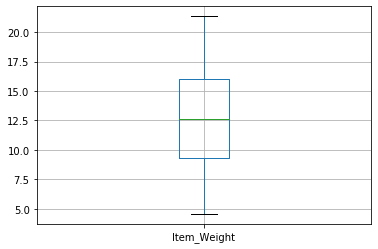

In [15]:
#Check for Outliers in Dataset
# --------------------------------------

sale.boxplot('Item_Weight')

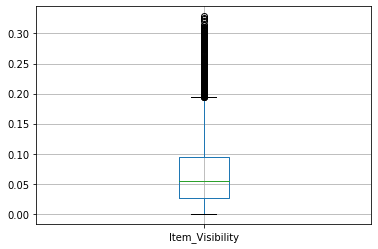

In [16]:
sale.boxplot(column='Item_Visibility')

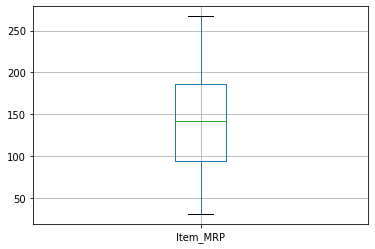

In [17]:
sale.boxplot(column='Item_MRP')

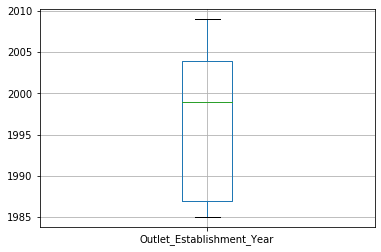

In [18]:
sale.boxplot('Outlet_Establishment_Year')

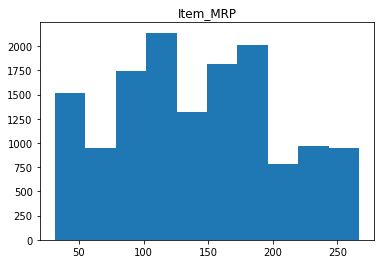

In [19]:
#Histogram for Item_MRP
plt.hist(sale.Item_MRP)
plt.title('Item_MRP')
plt.show()

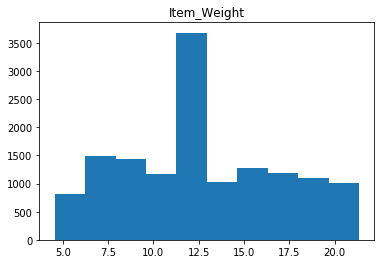

In [20]:
#Histogram for Item_Weight
plt.hist(sale.Item_Weight)
plt.title('Item_Weight')
plt.show()

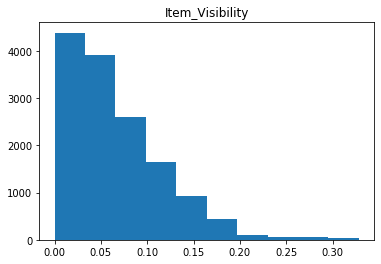

In [21]:
#Histogram for Item_Visibility
plt.hist(sale.Item_Visibility)
plt.title('Item_Visibility')
plt.show()

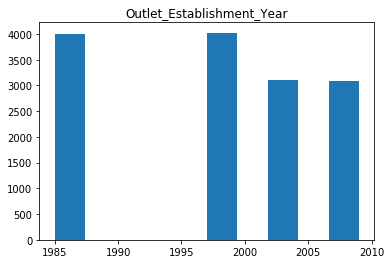

In [22]:
#Histogram for Outlet_Establishment_Year
plt.hist(sale.Outlet_Establishment_Year)
plt.title('Outlet_Establishment_Year')
plt.show()

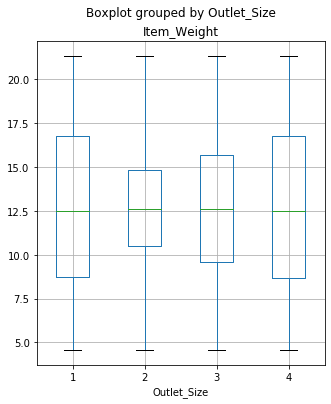

In [26]:
sale.boxplot('Item_Weight','Outlet_Size',figsize = (5,6))

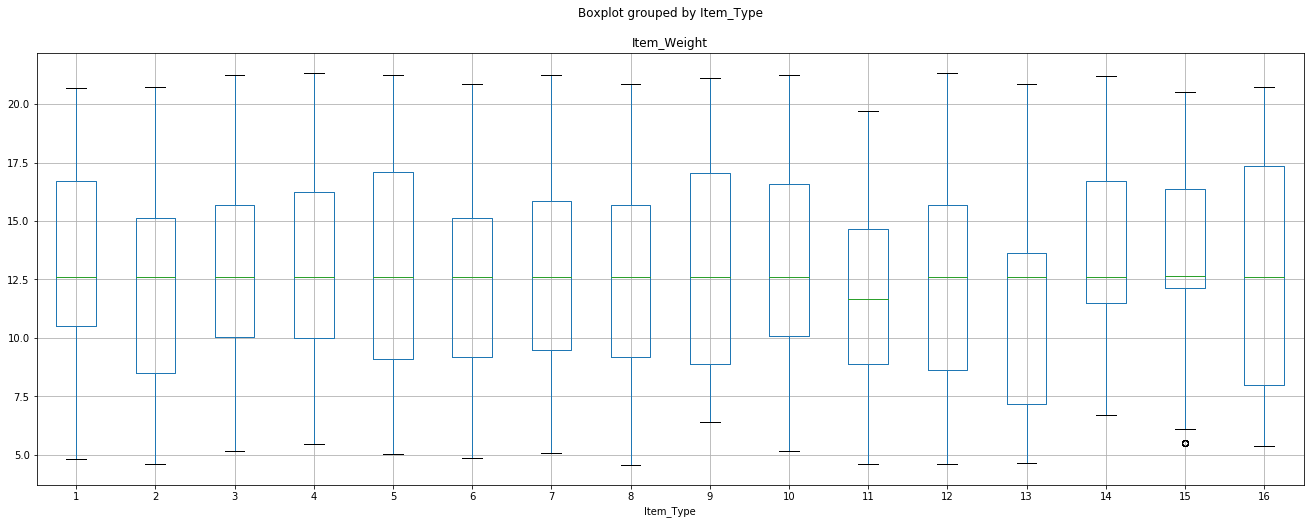

In [27]:
sale.boxplot('Item_Weight','Item_Type',figsize = (22,8))

C:\Users\SONALI\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


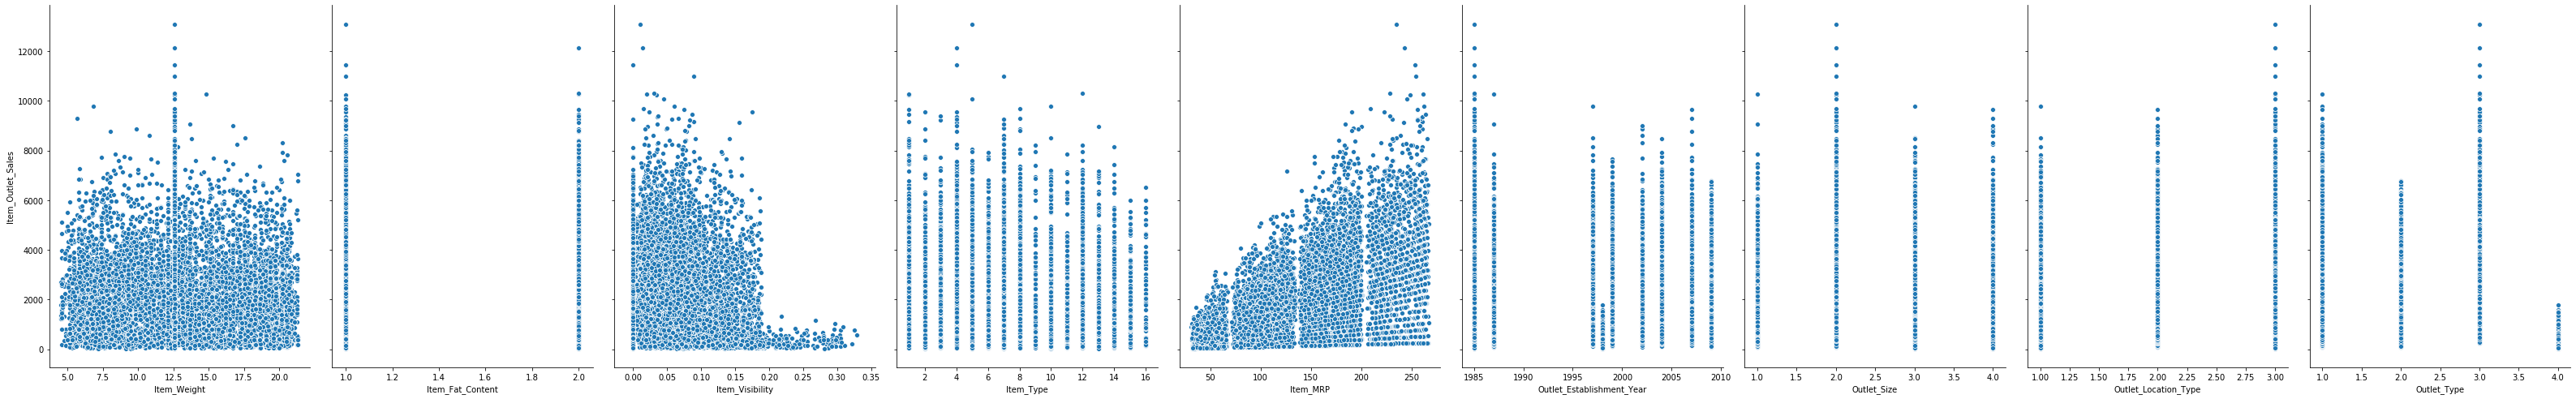

In [28]:
#Scatterplot 
sns.pairplot(sale, x_vars = ['Item_Weight', 'Item_Fat_Content','Item_Visibility',
'Item_Type','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'],y_vars = 'Item_Outlet_Sales',size = 7, aspect = 0.7)

In [59]:
# to find the correlation among variables (Multicollinearity)
sale.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.030091,-0.015366,-0.023527,0.033008,0.012448,0.001413,-0.003696,-0.014554,0.009693
Item_Fat_Content,-0.030091,1.000000,0.044274,-0.029135,-0.004019,0.000137,0.000194,0.001373,0.001023,0.018719
Item_Visibility,-0.015366,0.044274,1.000000,-0.009866,-0.006351,-0.083678,0.089297,-0.017362,0.229114,-0.128625
Item_Type,-0.023527,-0.029135,-0.009866,1.000000,-0.029092,-0.000683,-0.001290,-0.001709,-0.001178,-0.007849
Item_MRP,0.033008,-0.004019,-0.006351,-0.029092,1.000000,0.000141,-0.000835,0.000838,-0.000230,0.567574
Outlet_Establishment_Year,0.012448,0.000137,-0.083678,-0.000683,0.000141,1.000000,0.470388,-0.089328,-0.433171,-0.049135
Outlet_Size,0.001413,0.000194,0.089297,-0.001290,-0.000835,0.470388,1.000000,-0.290188,0.050180,-0.172477
Outlet_Location_Type,-0.003696,0.001373,-0.017362,-0.001709,0.000838,-0.089328,-0.290188,1.000000,0.290998,0.089367
Outlet_Type,-0.014554,0.001023,0.229114,-0.001178,-0.000230,-0.433171,0.050180,0.290998,1.000000,-0.209854
Item_Outlet_Sales,0.009693,0.018719,-0.128625,-0.007849,0.567574,-0.049135,-0.172477,0.089367,-0.209854,1.000000


In [61]:
cor = sale.iloc[:,0:9].corr()
cor

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Weight,1.000000,-0.030091,-0.015366,-0.023527,0.033008,0.012448,0.001413,-0.003696,-0.014554
Item_Fat_Content,-0.030091,1.000000,0.044274,-0.029135,-0.004019,0.000137,0.000194,0.001373,0.001023
Item_Visibility,-0.015366,0.044274,1.000000,-0.009866,-0.006351,-0.083678,0.089297,-0.017362,0.229114
Item_Type,-0.023527,-0.029135,-0.009866,1.000000,-0.029092,-0.000683,-0.001290,-0.001709,-0.001178
Item_MRP,0.033008,-0.004019,-0.006351,-0.029092,1.000000,0.000141,-0.000835,0.000838,-0.000230
Outlet_Establishment_Year,0.012448,0.000137,-0.083678,-0.000683,0.000141,1.000000,0.470388,-0.089328,-0.433171
Outlet_Size,0.001413,0.000194,0.089297,-0.001290,-0.000835,0.470388,1.000000,-0.290188,0.050180
Outlet_Location_Type,-0.003696,0.001373,-0.017362,-0.001709,0.000838,-0.089328,-0.290188,1.000000,0.290998
Outlet_Type,-0.014554,0.001023,0.229114,-0.001178,-0.000230,-0.433171,0.050180,0.290998,1.000000


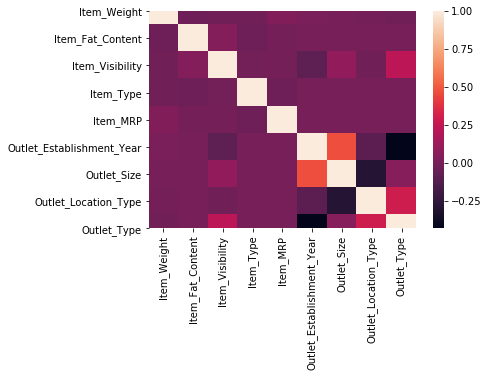

In [30]:
# correlation using visualization
# -------------------------------
# cor --> defined above as the correlation amongst the x-variables
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns)

In [31]:
# split the dataset into train and test
# --------------------------------------
cols = list(sale.columns)
sale.shape

training  = sale[sale["Item_Outlet_Sales"].notnull()][cols]
testing = sale[sale["Item_Outlet_Sales"].isnull() ][cols]

training.shape
testing.shape

# split the training dataset into Train and test
# sample = sample(2, nrow(diab), replace = T, prob = c(0.7,0.3))
training_x ,testing_x = train_test_split(training,test_size=0.3)

training_x.shape
testing_x.shape

# split the training_x and testing_x into X and Y variables
# ------------------------------------------------
train_x = training_x.iloc[:,0:9]; train_y = training_x.iloc[:,9]
test_x  = testing_x.iloc[:,0:9];  test_y = testing_x.iloc[:,9]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x.head()
train_y.head()

# ensure that the X variables are all numeric for regression
# ----------------------------------------------------------
training_x.dtypes    #int and float64
testing_x.dtypes

(5966, 9)
(5966,)
(2557, 9)
(2557,)


Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [32]:
#count of records
sale.count()

sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 10 columns):
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null int64
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null int64
Item_MRP                     14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  14204 non-null int64
Outlet_Location_Type         14204 non-null int64
Outlet_Type                  14204 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(6)
memory usage: 1.1 MB


In [33]:
#function -> getresiduals()
# -------------------------------
def getresiduals(lm,train_x,train_y):
    predicted = lm.predict(train_x)
    actual = train_y
    residual = actual-predicted
    
    return(residual)

# OLS Regression Model -1

In [34]:
# To add the constant term A (Y = A + B1X1 + B2X2 + ... + BnXn)
# ----------------------------------------------------------
    
train_x = sm.add_constant(train_x)    #to get values of intercept and slope.
test_x = sm.add_constant(test_x)
lm1 = sm.OLS(train_y, train_x).fit()       #  R-squared : 0.420  &  AIC : 1.026e+05

# interpret the result
# =====================
# 1) significant variables: having high |t| or low P values ( < 0.5)
# 2) coefficients = average(coeff(0.025,0.975))
lm1.summary()


C:\Users\SONALI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     484.8
Date:                Fri, 27 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:58:14   Log-Likelihood:                -51321.
No. Observations:                5966   AIC:                         1.027e+05
Df Residuals:                    5956   BIC:                         1.027e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      6.457e+04   5609.089     11.511      0.000    5.36e+04    7.56e+04
Item_Weight                  -0.5785      4.032     -0.143      0.886      -8.484       7.327
Item_Fat_Content             65.9939     35.794      1.844      0.065      -4.175     136.162
Item_Visibility           -2490.5637    341.076     -7.302      0.000   -3159.196   -1821.931
Item_Type                     6.8332      4.631      1.476      0.140      -2.245      15.911
Item_MRP                     15.9787      0.274     58.311      0.000      15.441      16.516
Outlet_Establishment_Year   -32.1908      2.824    -11.399      0.000     -37.727     -26.655
Outlet_Size                 -51.4165     22.747     -2.260      0.024     -96.009      -6.823
Outlet_Location_Type        317.4798     24.359     13.033      0.000     269.728     365.232
Outlet_Type                -468.7201     20.596    -22.757      0.000    -509.096    -428.344
==============================================================================
Omnibus:                      877.075   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2109.409
Skew:                           0.839   Prob(JB):                         0.00
Kurtosis:                       5.381   Cond. No.                     6.58e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# coefficients
lm1.params

const                        64567.117876
Item_Weight                     -0.578516
Item_Fat_Content                65.993904
Item_Visibility              -2490.563685
Item_Type                        6.833191
Item_MRP                        15.978678
Outlet_Establishment_Year      -32.190810
Outlet_Size                    -51.416476
Outlet_Location_Type           317.479758
Outlet_Type                   -468.720118
dtype: float64

### Validating the Assumptions

In [62]:
residuals = getresiduals(lm1,train_x,train_y)
print(residuals.head())

434     -777.339174
3151      41.678332
6382    -114.563671
547    -2171.718101
504     1009.134339
dtype: float64


5.310311046629339e-11


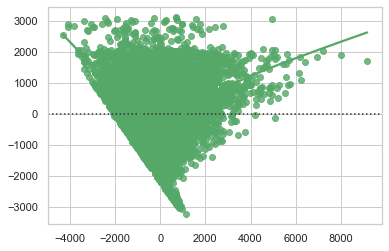

In [37]:
# 1) Residual mean is 0
# ----------------------------
print(residuals.mean()) 

# 2) Residuals have constant variance
# ------------------------------------
y = lm1.predict(train_x)
sns.set(style="whitegrid")
sns.residplot(residuals,y,lowess=True,color="g")


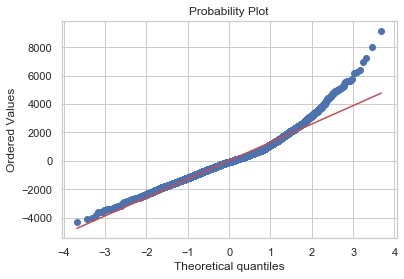

In [38]:
# 3) Residuals are normally distributed
# --------------------------------------
stats.probplot(residuals,dist="norm",plot=pylab)
pylab.show()


In [39]:
# 4) rows > columns
# ------------------
sale.shape

(14204, 10)

In [40]:
# VIF (Variance Inflation Factor)  ---->check multicollinearity
# -------------------------------  
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(train_x.values, i) for i in range(train_x.shape[1])]
vif["features"] = train_x.columns
print(vif) # variables with high VIF remove any of them
cols

      VIF Factor                   features
0  107977.705041                      const
1       1.003152                Item_Weight
2       1.005759           Item_Fat_Content
3       1.072015            Item_Visibility
4       1.004542                  Item_Type
5       1.002023                   Item_MRP
6       1.918060  Outlet_Establishment_Year
7       1.758251                Outlet_Size
8       1.335941       Outlet_Location_Type
9       1.715760                Outlet_Type


['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [57]:
# predict
# -----------------
pdct1 = lm1.predict(test_x)
print(pdct1.head())

# mean square error
# -----------------
mse = np.mean((pdct1 - test_y)**2)
print("MSE = {0}, RMSE = {1}".format(mse,math.sqrt(mse)))


4157    3112.480254
1087    3796.636650
5155    1935.369341
169      822.883108
7761    2501.657766
dtype: float64
MSE = 1578443.6082147511, RMSE = 1256.361257049401


In [58]:
# store the actual and predicted values in a dataframe for comparison
# -------------------------------------------------------------------
actual = list(test_y.head(50))
predicted = np.round(np.array(list(pdct1.head(50))),2)
print(predicted)

df_results = pd.DataFrame({'actual':actual, 'predicted':predicted})
print(df_results.head())

[3112.48 3796.64 1935.37  822.88 2501.66 1653.69 -349.92 1668.27 2599.09
 1322.22 3659.9  2287.43 2957.53 2506.82  797.83  515.15 1486.22 2101.96
 1751.07 4942.37  603.2  1076.78 1658.37 2805.13 1435.89 3498.43  651.86
 1498.18 1016.07 1717.77 2084.74 3891.6  1455.28 3990.54 2111.25 1029.11
 3005.41 2184.69 1938.81  517.97 3624.35 -353.56  414.28  617.33  505.03
 3759.41 1537.52  747.97 3603.48 2557.88]
      actual  predicted
0  2141.2128    3112.48
1  1522.0188    3796.64
2   354.2056    1935.37
3   619.1940     822.88
4  1403.5064    2501.66


# Feature Selection

In [43]:
X1  = train_x.iloc[:,1:10]
features = fs(X1,train_y,center=True)
list(features[0]) # 0 will give you the score. and 1 will give the p-value.
# pd.DataFrame({'column':cols[1:9], 'coefficieint':coefficients})

features = pd.DataFrame({"columns":train_x.columns[1:10], 
                            "score":features[0],
                            "p-val":features[1]
                            })  
print(features)  # select variables with high score


                     columns        score         p-val
0                Item_Weight     1.769996  1.834334e-01
1           Item_Fat_Content     1.734730  1.878585e-01
2            Item_Visibility   117.984797  3.138413e-27
3                  Item_Type     0.005833  9.391221e-01
4                   Item_MRP  2898.975559  0.000000e+00
5  Outlet_Establishment_Year    13.227116  2.782571e-04
6                Outlet_Size   172.480680  7.326943e-39
7       Outlet_Location_Type    46.501042  1.005969e-11
8                Outlet_Type   244.415178  5.005476e-54


In [44]:
#Build model -2 with significant variables
# -----------------------------------

sale1=sale.loc[:,['Item_MRP','Outlet_Type','Outlet_Size','Item_Visibility','Outlet_Location_Type','Item_Outlet_Sales']]

# split the dataset into train and test
# --------------------------------------
cols1 = list(sale1.columns)
sale1.shape

training1  = sale1[sale1["Item_Outlet_Sales"].notnull()][cols1]
testing1 = sale1[sale1["Item_Outlet_Sales"].isnull() ][cols1]

training1.shape
testing1.shape

# split the training dataset into Train and test
# sample = sample(2, nrow(diab), replace = T, prob = c(0.7,0.3))
training_x1 ,testing_x1 = train_test_split(training1,test_size=0.3)

training_x1.shape
testing_x1.shape

# split the training_x and testing_x into X and Y variables
# ------------------------------------------------
train_x1 = training_x1.iloc[:,0:5]; train_y1 = training_x1.iloc[:,5]
test_x1  = testing_x1.iloc[:,0:5];  test_y1 = testing_x1.iloc[:,5]

print(train_x1.shape)
print(train_y1.shape)
print(test_x1.shape)
print(test_y1.shape)

# ensure that the X variables are all numeric for regression
# ----------------------------------------------------------
training_x1.dtypes    #int and float64
testing_x1.dtypes

(5966, 5)
(5966,)
(2557, 5)
(2557,)


Item_MRP                float64
Outlet_Type               int64
Outlet_Size               int64
Item_Visibility         float64
Outlet_Location_Type      int64
Item_Outlet_Sales       float64
dtype: object

# OLS Regression Model - 2

In [45]:
# To add the constant term A (Y = A + B1X1 + B2X2 + ... + BnXn)
# Xn = ccomp,slag,flyash.....
# ----------------------------------------------------------
train_x1 = sm.add_constant(train_x1)    #to get values of intercept and slope.
test_x1 = sm.add_constant(test_x1)
lm2 = sm.OLS(train_y1, train_x1).fit()
lm2.summary()

C:\Users\SONALI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     822.8
Date:                Fri, 27 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:01:31   Log-Likelihood:                -51225.
No. Observations:                5966   AIC:                         1.025e+05
Df Residuals:                    5960   BIC:                         1.025e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  822.3588     88.190      9.325      0.000     649.475     995.243
Item_MRP                15.2514      0.271     56.340      0.000      14.721      15.782
Outlet_Type           -359.4252     16.630    -21.613      0.000    -392.026    -326.824
Outlet_Size           -213.1716     17.852    -11.941      0.000    -248.168    -178.176
Item_Visibility      -2038.3176    331.545     -6.148      0.000   -2688.265   -1388.370
Outlet_Location_Type   249.7376     22.858     10.925      0.000     204.927     294.548
==============================================================================
Omnibus:                      976.247   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2317.734
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                       5.423   Cond. No.                     3.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# predict
# -----------------
pdct2 = lm2.predict(test_x1)
print(pdct2)

# mean square error
# -----------------
mse1 = np.mean((pdct2 - test_y1)**2)
print("MSE = {0}, RMSE = {1}".format(mse1,math.sqrt(mse1)))


3717    3796.231077
208      527.043692
1061     585.110563
4397    1265.629872
7636     688.563554
           ...     
7253    1434.048388
2453    1995.797294
4348    2097.700010
6934    4169.513568
7371    2451.329247
Length: 2557, dtype: float64
MSE = 1841329.2739767479, RMSE = 1356.9558850518126


In [65]:
# store the actual and predicted values in a dataframe for comparison
# -------------------------------------------------------------------
actual1 = list(test_y1.head(50))
predicted1 = np.round(np.array(list(pdct2.head(50))),2)
print(predicted1)

df_results1 = pd.DataFrame({'actual':actual1, 'predicted':predicted1})
print(df_results1.head())

[3796.23  527.04  585.11 1265.63  688.56 1599.16 1320.62 1701.52 3289.78
 2748.7  2635.07 3631.83 1520.4  2150.01 3380.91 1658.27 1673.02 1396.45
 1903.24 1613.03 -775.79 2989.41  927.16 1774.6  2902.05  559.27 1581.85
 1703.25 1056.92 1407.26 1805.27 1129.47 1823.82 3552.33 2542.95 3405.58
  786.03  877.95 2937.08 2759.54 1578.39 4184.15  872.68 2884.3  2181.1
 1804.98 3104.36 2280.39 2281.74 1819.92]
      actual  predicted
0  1950.7940    3796.23
1   317.5866     527.04
2  1160.4894     585.11
3  3466.1548    1265.63
4   575.2512     688.56


# Model -3

In [48]:
#Build model -3 with significant variables
# -----------------------------------
sale2=sale.loc[:,['Item_MRP','Outlet_Type','Outlet_Size','Item_Visibility','Item_Outlet_Sales']]

# split the dataset into train and test
# --------------------------------------
cols2 = list(sale2.columns)
sale2.shape

training2  = sale2[sale2["Item_Outlet_Sales"].notnull()][cols2]
testing2 = sale2[sale2["Item_Outlet_Sales"].isnull() ][cols2]

training2.shape
testing2.shape

# split the training dataset into Train and test
# sample = sample(2, nrow(diab), replace = T, prob = c(0.7,0.3))
training_x2 ,testing_x2 = train_test_split(training2,test_size=0.3)

training_x2.shape
testing_x2.shape

# split the training_x and testing_x into X and Y variables
# ------------------------------------------------
train_x2 = training_x2.iloc[:,0:4]; train_y2 = training_x2.iloc[:,4]
test_x2  = testing_x2.iloc[:,0:4];  test_y2 = testing_x2.iloc[:,4]

# ensure that the X variables are all numeric for regression
# ----------------------------------------------------------
training_x2.dtypes    #int and float64
testing_x2.dtypes

#OLS Regression Model - 3
# To add the constant term A (Y = A + B1X1 + B2X2 + ... + BnXn)
# ----------------------------------------------------------
train_x2 = sm.add_constant(train_x2)    #to get values of intercept and slope.
test_x2 = sm.add_constant(test_x2)
lm3 = sm.OLS(train_y2, train_x2).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     982.1
Date:                Fri, 27 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:02:28   Log-Likelihood:                -51276.
No. Observations:                5966   AIC:                         1.026e+05
Df Residuals:                    5961   BIC:                         1.026e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1459.8535     68.769     21.228      0.000    1325.042    1594.665
Item_MRP           15.1912      0.273     55.653      0.000      14.656      15.726
Outlet_Type      -304.7699     15.938    -19.123      0.000    -336.014    -273.526
Outlet_Size      -272.3102     17.247    -15.788      0.000    -306.121    -238.499
Item_Visibility -2343.0223    339.869     -6.894      0.000   -3009.289   -1676.755
==============================================================================
Omnibus:                      949.618   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2206.615
Skew:                           0.913   Prob(JB):                         0.00
Kurtosis:                       5.354   Cond. No.                     3.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
# predict
# -----------------
pdct3 = lm3.predict(test_x2)
print(pdct3.head())

# mean square error
# -----------------
mse2 = np.mean((pdct3 - test_y2)**2)
print("MSE = {0}, RMSE = {1}".format(mse2,math.sqrt(mse2)))# predict

6001    2127.400108
3556     642.593028
7594     260.461213
6983    1074.661698
3296     909.776681
dtype: float64
MSE = 1881372.07552788, RMSE = 1371.6311732852532


In [56]:
# store the actual and predicted values in a dataframe for comparison
# -------------------------------------------------------------------
actual2 = list(test_y2.head(50))
predicted2 = np.round(np.array(list(pdct3.head(50))),2)
print(predicted)

df_results2 = pd.DataFrame({'actual':actual2, 'predicted':predicted2})
print(df_results2.head())

[3112.48 3796.64 1935.37  822.88 2501.66 1653.69 -349.92 1668.27 2599.09
 1322.22 3659.9  2287.43 2957.53 2506.82  797.83  515.15 1486.22 2101.96
 1751.07 4942.37  603.2  1076.78 1658.37 2805.13 1435.89 3498.43  651.86
 1498.18 1016.07 1717.77 2084.74 3891.6  1455.28 3990.54 2111.25 1029.11
 3005.41 2184.69 1938.81  517.97 3624.35 -353.56  414.28  617.33  505.03
 3759.41 1537.52  747.97 3603.48 2557.88]
     actual  predicted
0  703.0848    2127.40
1  203.7348     642.59
2   99.2042     260.46
3  357.5346    1074.66
4  308.9312     909.78


# Model - 4  
### (Predict on actual testing set using Model - 2 )

In [51]:
# split the dataset into train and test
# --------------------------------------
cols3 = list(sale1.columns)
sale1.shape

training3  = sale1[sale1["Item_Outlet_Sales"].notnull()][cols3]
testing3 = sale1[sale1["Item_Outlet_Sales"].isnull() ][cols3]

# split the training3 and testing3 into X and Y variables
# ------------------------------------------------
train_x3 = training3.iloc[:,0:5]; train_y3 = training3.iloc[:,5]
test_x3  = testing3.iloc[:,0:5];  test_y3 = testing3.iloc[:,5]


# ensure that the X variables are all numeric for regression
# ----------------------------------------------------------
train_x3.dtypes    #int and float64
test_x3.dtypes

Item_MRP                float64
Outlet_Type               int64
Outlet_Size               int64
Item_Visibility         float64
Outlet_Location_Type      int64
dtype: object

In [52]:
#OLS Regression Model - 4
# To add the constant term A (Y = A + B1X1 + B2X2 + ... + BnXn)
# ----------------------------------------------------------
train_x3 = sm.add_constant(train_x3)    #to get values of intercept and slope.
test_x3 = sm.add_constant(test_x3)
lm4 = sm.OLS(train_y3, train_x3).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     1167.
Date:                Fri, 27 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:03:54   Log-Likelihood:                -73299.
No. Observations:                8523   AIC:                         1.466e+05
Df Residuals:                    8517   BIC:                         1.467e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  778.8681     74.800     10.413      0.000     632.241     925.495
Item_MRP                15.5017      0.229     67.774      0.000      15.053      15.950
Outlet_Type           -343.3488     14.200    -24.179      0.000    -371.185    -315.513
Outlet_Size           -208.1142     15.231    -13.664      0.000    -237.971    -178.258
Item_Visibility      -2151.4569    284.972     -7.550      0.000   -2710.070   -1592.843
Outlet_Location_Type   243.9827     19.388     12.584      0.000     205.978     281.987
==============================================================================
Omnibus:                     1408.407   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3443.339
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                       5.498   Cond. No.                     3.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# predict
# -----------------
pdct4 = lm4.predict(test_x3)
print(pdct4.head())

# mean square error
# -----------------
mse3 = np.mean((pdct4 - test_y3)**2)
print("MSE = {0}, RMSE = {1}".format(mse3,math.sqrt(mse3)))

8523    1919.043137
8524    1361.955630
8525    2838.322329
8526    2461.207314
8527    3440.337892
dtype: float64
MSE = nan, RMSE = nan


In [54]:
# store the actual and predicted values in a dataframe for comparison
# -------------------------------------------------------------------
actual3 = list(test_y3.head(50))
predicted3 = np.round(np.array(list(pdct4.head(50))),2)
print(predicted3)

[1919.04 1361.96 2838.32 2461.21 3440.34 1733.87 1006.86 1287.14 1309.8
 2975.91 1702.77 1187.08 2383.95 1959.76 1720.28 2442.96 3055.93 3305.89
 1704.3  1884.23 3435.78 3625.4   654.01 1172.68 3025.1  2469.72  961.55
 2360.14 3723.11 2056.49 -622.4  3382.22 1050.72 3386.54 2428.72 3225.2
 1140.44  963.82 2877.16 1633.06 2567.83  964.22 2402.96 2619.4  2544.03
 2426.78 -456.35 3025.03 3863.65 1829.61]


In [63]:
df_results3 = pd.DataFrame({'actual':actual3, 'predicted':predicted3})
print(df_results3.head())
#pyhton_project.py
#Displaying pyhton_project.py

   actual  predicted
0     NaN    1919.04
1     NaN    1361.96
2     NaN    2838.32
3     NaN    2461.21
4     NaN    3440.34
